# Linear Regression 2

### Install libraries

In [1]:
# ! pip install sklearn
# ! pip install seaborn

### Import libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

# import visualization libraries
from matplotlib import pyplot as plt     # same as 'import matplotlib.pyplot as plt'
# plot the graph embedded in the notebook
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Load data

In [3]:
# Load Boston housing data set
boston = load_boston()

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
type(boston.data)

numpy.ndarray

In [9]:
boston.data.shape

(506, 13)

In [10]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [11]:
type(boston.target)

numpy.ndarray

In [12]:
boston.target.shape

(506,)

In [13]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Setup dataframe

In [14]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
# Calculate average price
avg_price = df['PRICE'].mean()
avg_price

22.532806324110698

In [17]:
# Prepare dataset (X_rooms) to contain only 1 independent variable
X_rooms = df["RM"]
print(X_rooms.shape)

y_price = df["PRICE"]
print(y_price.shape)

(506,)
(506,)


In [18]:
# Reshape numpy arrays to be used in model training
X_rooms = np.array(X_rooms).reshape(-1,1)
print(X_rooms.shape)
y_price = np.array(y_price).reshape(-1,1)
print(y_price.shape)

(506, 1)
(506, 1)


### Split data into training and test sets

In [19]:
# Training set will contain 80% of the samples, test set will contain the remaining 20%
X_train_1, X_test_1, y_train_1, y_test_1 = \
    train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(X_test_1.shape)

(404, 1)
(102, 1)


### Train simple model on training set - only 1 independent variable (RM)

In [20]:
model = LinearRegression()
model.fit(X_train_1, y_train_1)

LinearRegression()

### Calculate (simple) model performance for training and test sets

* Mean Squared Error (MSE) is a measure of how close a fitted line is to the data points. The smaller the MSE, the closer the fit is to the data.
* Root Mean Squared Error (RMSE) is the square root of the MSE.  RMSE is a better measure of goodness of fit.
* r2 is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
  * Another definition of r2 is: (total variance explained by the model) / total variance
  * 100% = perfect correlation

In [21]:
y_train_predict_1 = model.predict(X_train_1)
mse = mean_squared_error(y_train_1, y_train_predict_1)
rmse = np.sqrt(mse)

r2 = round(model.score(X_train_1, y_train_1),2)

print("Simple model performance for training set")
print("-----------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 (model) score is {}'.format(r2))

Simple model performance for training set
-----------------------------------------
MSE is 48.612648648611334
RMSE is 6.972277149440585
R2 (model) score is 0.43


In [22]:
y_pred_1 = model.predict(X_test_1)
mse = mean_squared_error(y_test_1, y_pred_1)
rmse = np.sqrt(mse)

r2 = round(model.score(X_test_1, y_test_1),2)

print("Simple model performance for test set")
print("-------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 (model) score is {}'.format(r2))

Simple model performance for test set
-------------------------------------
MSE is 23.970455527991305
RMSE is 4.895963186952216
R2 (model) score is 0.69


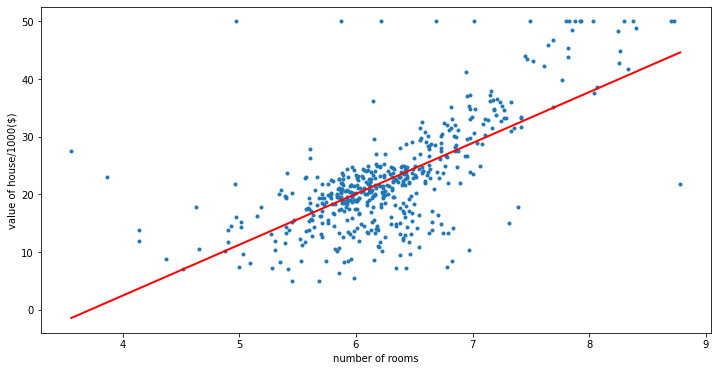

In [23]:
# Plot the model fitted line on the output variable.
plt.figure(figsize=(12, 6))
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms, y_price, marker='.')
plt.plot(prediction_space, model.predict(prediction_space), color = 'red', linewidth = 2)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

### Train model using all 13 independent variables

In [24]:
# Prepare dataset to contain all 13 independent variables
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

In [25]:
y = np.array(y).reshape(-1,1)

In [26]:
# Regenerate full training and test sets (80%/20%)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state=5)

In [27]:
# model = LinearRegression()     # commented out because it was set previously
model.fit(X_train, y_train)

LinearRegression()

### Calculate (full) model performance for training and test sets

In [28]:
# Calculate full model performance for training set
y_train_predict = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_predict)
rmse = np.sqrt(mse)

r2 = round(model.score(X_train, y_train),2)

print("Full model performance for training set")
print("---------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 (model) score is {}'.format(r2))

Full model performance for training set
---------------------------------------
MSE is 22.477090408387628
RMSE is 4.741000992236516
R2 (model) score is 0.74


In [29]:
# Calculate full model evaluation for test set

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = round(model.score(X_test, y_test),2)

print("Full model performance for test set")
print("-----------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 (model) score is {}'.format(r2))

Full model performance for test set
-----------------------------------
MSE is 20.869292183770682
RMSE is 4.568292042303193
R2 (model) score is 0.73


Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

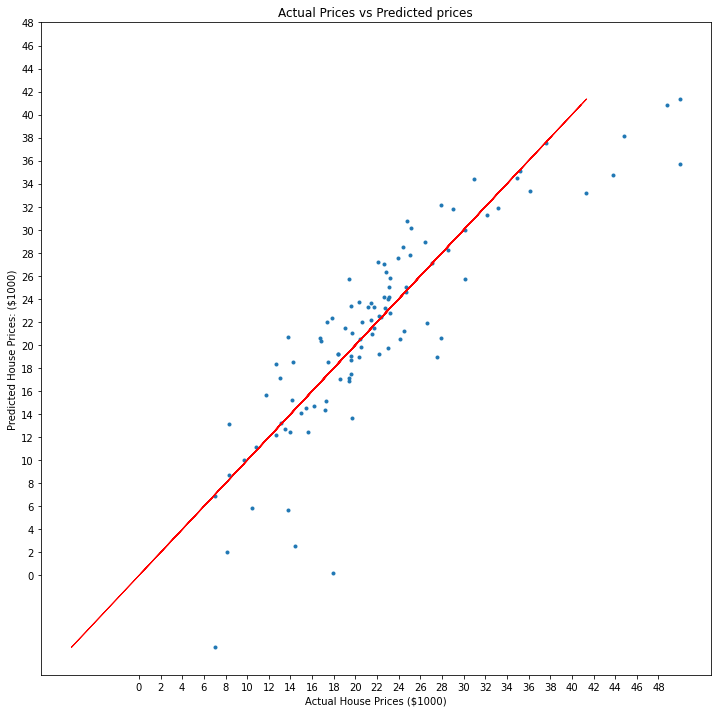

In [30]:
# Plot original house prices vs predicted house prices
plt.figure(figsize=(12, 12))
plt.scatter(y_test, y_pred, marker='.')
plt.plot(y_pred, y_pred, color = 'red', linewidth = 1)     # Identity line
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(y_test)),2))
plt.yticks(range(0, int(max(y_test)),2))
plt.title("Actual Prices vs Predicted prices")

In [31]:
model.intercept_

array([37.91248701])

In [32]:
model.coef_

array([[-1.30799852e-01,  4.94030235e-02,  1.09535045e-03,
         2.70536624e+00, -1.59570504e+01,  3.41397332e+00,
         1.11887670e-03, -1.49308124e+00,  3.64422378e-01,
        -1.31718155e-02, -9.52369666e-01,  1.17492092e-02,
        -5.94076089e-01]])

In [33]:
min_values = X.min()
min_values

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
dtype: float64

In [34]:
max_values = X.max()
max_values

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
dtype: float64

In [35]:
# Execute full model with new independent variable values (values created by professor)
new_CRIM = 17
new_ZN = 75
new_INDUS = 0.5
new_CHAS = 1
new_NOX = 0.4
new_RM = 5.5
new_AGE = 23
new_DIS = 7
new_RAD = 2
new_TAX = 500
new_PTRATIO = 15
new_B = 100
new_LSTAT = 5

new_y = model.intercept_ + ( model.coef_[0][0] * new_CRIM ) + (model.coef_[0][1] * new_ZN ) + \
        (model.coef_[0][2] * new_INDUS ) + (model.coef_[0][3] * new_CHAS ) + (model.coef_[0][4] * new_NOX ) + \
        (model.coef_[0][5] * new_RM ) + (model.coef_[0][6] * new_AGE ) + (model.coef_[0][7] * new_DIS ) + \
        (model.coef_[0][8] * new_RAD ) + (model.coef_[0][9] * new_TAX ) + (model.coef_[0][10] * new_PTRATIO ) + \
        (model.coef_[0][11] * new_B ) + (model.coef_[0][12] * new_LSTAT )
predicted_house_value = "{:,}".format(round(new_y[0]*1000))
print('Predicted house value = $', predicted_house_value)

Predicted house value = $ 22,130
